In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# Eval transformation functions

def most_common(lst): 
    return max(set(lst), key = lst.count)

def reveal_bias(url):
    path = url.split('/', 1)[1]
    apps = re.sub('[/-]', ' ',path).split()[:-1]
    return most_common(apps)

def add_bias_labels(col_lst):
    for i in range(len(col_lst)):
        col_lst[i] = col_lst[i] + "-bias-" + reveal_bias(col_lst[i])
    return col_lst

In [3]:
ex_1_df = pd.read_parquet("./Auto-scaling-results/ex-1-logs.parquet")
ex_2_df = pd.read_parquet("./Auto-scaling-results/ex-2-logs.parquet")

In [5]:
ex_1_df.resp_time = ex_1_df.resp_time.astype(float)
ex_2_df.resp_time = ex_2_df.resp_time.astype(float)

In [6]:
'''
ex_1_df = pd.get_dummies(ex_1_df, columns = ['url'])
ex_2_df = pd.get_dummies(ex_2_df, columns = ['url'])
'''

"\nex_1_df = pd.get_dummies(ex_1_df, columns = ['url'])\nex_2_df = pd.get_dummies(ex_2_df, columns = ['url'])\n"

In [6]:
ex_1_df.resp_time.mean()

24.938720609947968

In [7]:
ex_2_df.resp_time.mean()

25.910016438001545

In [8]:
url_features = ex_1_df.url.unique().tolist()

In [9]:
bias_lst = add_bias_labels(url_features)

In [11]:
bias_2 = [x[:-7] for x in bias_lst if "bias-2" in x]
bias_3 = [x[:-7] for x in bias_lst if "bias-3" in x]
bias_4 = [x[:-7] for x in bias_lst if "bias-4" in x]

In [13]:
def is_bias(url, lst):
    if url in lst:
        return True
    else:
        return False

In [14]:
for df in [ex_1_df, ex_2_df]:
    df["bias_2"] = df["url"].apply(lambda x: is_bias(x, bias_2))
    df["bias_3"] = df["url"].apply(lambda x: is_bias(x, bias_3))
    df["bias_4"] = df["url"].apply(lambda x: is_bias(x, bias_4))

In [15]:
ex_1_df

,resp_time,bytes_sent,resp_code,url,datetime,app_1_containers,app_2_containers,app_3_containers,app_4_containers,bias_2,bias_3,bias_4
0,0.113,218,200,/3/3-3-2-2/115,2019-09-23 20:26:34,3,3,3,3,False,True,False
1,0.108,218,200,/2/3-3-3-3/125,2019-09-23 20:26:34,3,3,3,3,False,True,False
2,0.352,188,200,/4/4/231,2019-09-23 20:26:34,3,3,3,3,False,False,True
3,0.037,198,200,/3/3-2/82,2019-09-23 20:26:34,3,3,3,3,False,True,False
4,0.425,227,200,/2/3-2-3-4-2/94,2019-09-23 20:26:34,3,3,3,3,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
141312,14.095,0,499,/2/3-3-3-3/84,2019-09-23 22:42:05,3,3,3,3,False,True,False
141313,17.632,0,499,/4/3-4-4-3/216,2019-09-23 22:42:05,3,3,3,3,False,False,True
141314,10.627,0,499,/2/3-4-2-3/152,2019-09-23 22:42:05,3,3,3,3,False,True,False
141315,28.662,0,499,/3/4-2-3-4/56,2019-09-23 22:42:05,3,3,3,3,False,False,True


bias_2  bias_3  bias_4
False   False   True      AxesSubplot(0.125,0.125;0.775x0.755)
        True    False     AxesSubplot(0.125,0.125;0.775x0.755)
True    False   False     AxesSubplot(0.125,0.125;0.775x0.755)
Name: resp_time, dtype: object

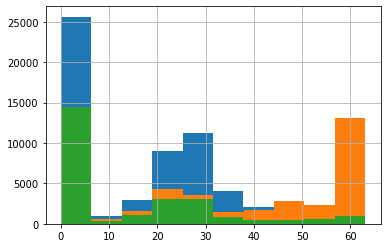

In [16]:
ex_1_df.groupby(["bias_2", "bias_3", "bias_4"]).resp_time.hist()

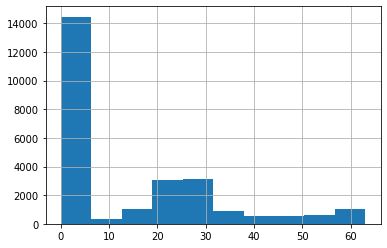

In [17]:
ex_1_df[ex_1_df["bias_2"] == True].resp_time.hist()

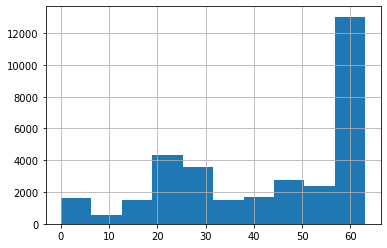

In [18]:
ex_1_df[ex_1_df["bias_3"] == True].resp_time.hist()

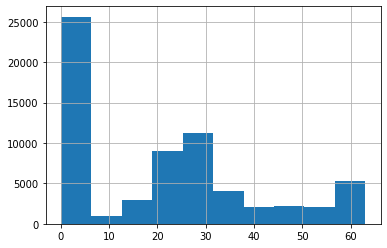

In [19]:
ex_1_df[ex_1_df["bias_4"] == True].resp_time.hist()

bias_2  bias_3  bias_4
False   False   True      AxesSubplot(0.125,0.125;0.775x0.755)
        True    False     AxesSubplot(0.125,0.125;0.775x0.755)
True    False   False     AxesSubplot(0.125,0.125;0.775x0.755)
Name: resp_time, dtype: object

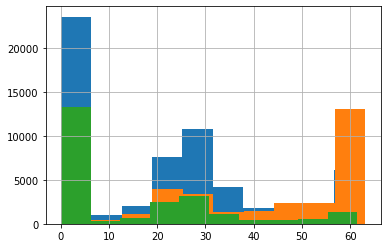

In [20]:
ex_2_df.groupby(["bias_2", "bias_3", "bias_4"]).resp_time.hist()

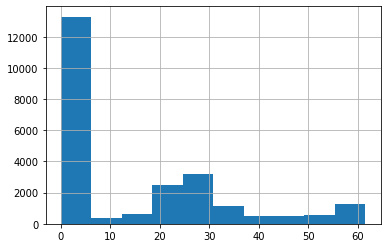

In [21]:
ex_2_df[ex_2_df["bias_2"] == True].resp_time.hist()

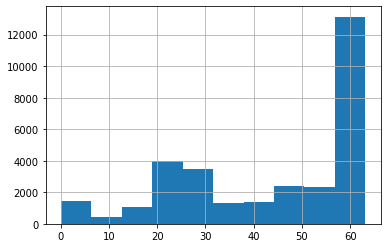

In [22]:
ex_2_df[ex_2_df["bias_3"] == True].resp_time.hist()

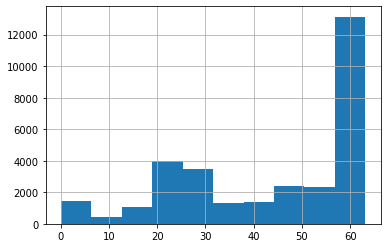

In [23]:
ex_2_df[ex_2_df["bias_3"] == True].resp_time.hist()

In [38]:
# Error rate

In [25]:
ex_1_df

,resp_time,bytes_sent,resp_code,url,datetime,app_1_containers,app_2_containers,app_3_containers,app_4_containers,bias_2,bias_3,bias_4
0,0.113,218,200,/3/3-3-2-2/115,2019-09-23 20:26:34,3,3,3,3,False,True,False
1,0.108,218,200,/2/3-3-3-3/125,2019-09-23 20:26:34,3,3,3,3,False,True,False
2,0.352,188,200,/4/4/231,2019-09-23 20:26:34,3,3,3,3,False,False,True
3,0.037,198,200,/3/3-2/82,2019-09-23 20:26:34,3,3,3,3,False,True,False
4,0.425,227,200,/2/3-2-3-4-2/94,2019-09-23 20:26:34,3,3,3,3,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
141312,14.095,0,499,/2/3-3-3-3/84,2019-09-23 22:42:05,3,3,3,3,False,True,False
141313,17.632,0,499,/4/3-4-4-3/216,2019-09-23 22:42:05,3,3,3,3,False,False,True
141314,10.627,0,499,/2/3-4-2-3/152,2019-09-23 22:42:05,3,3,3,3,False,True,False
141315,28.662,0,499,/3/4-2-3-4/56,2019-09-23 22:42:05,3,3,3,3,False,False,True


In [26]:
ex_1_df.resp_code.value_counts()

200    104836
110     17372
504     17371
499      1738
Name: resp_code, dtype: int64

In [27]:
ex_2_df.resp_code.value_counts()

200    95120
110    18385
504    18385
499     2189
502      134
500       62
Name: resp_code, dtype: int64